### Name:-Singh Vishal Rajesh            ,                                  Project on:Weather Forecasting Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading File

In [2]:
data = pd.read_csv(r"C:\Users\hp\Desktop\ML project\weatherForecasting.csv")
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### Size of the data:

In [3]:
data.shape #no of rows and columns

(8784, 8)

In [4]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [5]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


### Type of weather:

In [7]:
data.Weather.value_counts() #it will give you different weather

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [8]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [9]:
data.Weather.nunique() #total no of weather

50

### converting the weather categories into standard categories:

In [10]:
x = 'Thunderstorms,Moderate Rain Showers,Fog' #we only check only 4 category

In [11]:
list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [12]:
from itertools import chain              # by this we use to check whether it is rain or fog etc.
flat_list = list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [13]:
def create_list(x):
    list_of_lists = [w.split() for w in x.split(',')]
    flat_list = list(chain(*list_of_lists))
    return flat_list
    
    
def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+RAIN'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'Clear'
    elif 'Cloudy' in list1:
        return 'CLOUDY'
    else:
        return 'RAIN'

In [14]:
create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [15]:
 Get_Weather(create_list(x)) #so there is rain and fog

'RAIN+FOG'

In [16]:
data['std_Weather'] = data['Weather'].apply(lambda x :  Get_Weather(create_list(x)))

In [17]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [18]:
data.std_Weather.value_counts() #7categories

CLOUDY       3797
Clear        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: std_Weather, dtype: int64

### sample selection adn data balancing

In [19]:
cloudy_df = data[data['std_Weather'] == 'CLOUDY']
cloudy_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy,CLOUDY
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy,CLOUDY
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy,CLOUDY
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy,CLOUDY
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy,CLOUDY
...,...,...,...,...,...,...,...,...,...
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy,CLOUDY
8763,12/31/2012 3:00,-11.8,-14.4,81,6,25.0,101.42,Mostly Cloudy,CLOUDY
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy,CLOUDY
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy,CLOUDY


In [20]:
cloudy_df = data[data['std_Weather'] == 'CLOUDY'].sample(600)
cloudy_df #cloudy

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
5157,8/2/2012 21:00,26.8,15.5,50,24,25.0,100.53,Cloudy,CLOUDY
7431,11/5/2012 15:00,1.8,-7.6,50,20,24.1,101.41,Mostly Cloudy,CLOUDY
2341,4/7/2012 13:00,6.8,-7.8,34,9,48.3,101.44,Mostly Cloudy,CLOUDY
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy,CLOUDY
3945,6/13/2012 9:00,17.0,11.7,71,24,24.1,101.09,Mostly Cloudy,CLOUDY
...,...,...,...,...,...,...,...,...,...
3655,6/1/2012 7:00,14.6,5.3,54,9,48.3,101.44,Cloudy,CLOUDY
2782,4/25/2012 22:00,6.2,0.2,65,9,25.0,100.69,Mostly Cloudy,CLOUDY
2943,5/2/2012 15:00,14.0,9.1,72,19,16.1,101.42,Mostly Cloudy,CLOUDY
4095,6/19/2012 15:00,28.1,19.2,58,20,24.1,100.92,Mostly Cloudy,CLOUDY


In [21]:
cloudy_df = data[data['std_Weather'] == 'Clear'].sample(600)
cloudy_df #Clear

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
5917,9/3/2012 13:00,26.2,10.0,36,4,48.3,101.50,Mainly Clear,Clear
7759,11/19/2012 7:00,-4.6,-7.1,83,9,16.1,102.99,Clear,Clear
3992,6/15/2012 8:00,18.6,9.5,55,17,48.3,102.40,Mainly Clear,Clear
5647,8/23/2012 7:00,20.3,15.9,76,19,24.1,101.37,Clear,Clear
6441,9/25/2012 9:00,16.3,8.6,60,32,48.3,100.93,Mainly Clear,Clear
...,...,...,...,...,...,...,...,...,...
8116,12/4/2012 4:00,3.1,1.3,88,20,25.0,101.56,Mainly Clear,Clear
7994,11/29/2012 2:00,-6.3,-11.9,64,17,25.0,101.80,Clear,Clear
695,1/29/2012 23:00,-3.4,-7.6,73,15,25.0,100.85,Clear,Clear
6239,9/16/2012 23:00,12.1,5.6,64,6,25.0,101.21,Clear,Clear


In [22]:
cloudy_df = data[data['std_Weather'] == 'CLOUDY']
cloudy_df_sample = cloudy_df.sample(600)
cloudy_df_sample.shape

(600, 9)

In [23]:
clear_df = data[data['std_Weather'] == 'Clear'].sample(600)
clear_df.shape

(600, 9)

### dataset balancing:

In [24]:
#cloudy_df = data[data['std_Weather'] == 'CLOUDY'].sample(700)
#cloudy_df = data[data['std_Weather'] == 'Clear'].sample(700)
rain_df = data[data['std_Weather'] == 'RAIN']
snow_df = data[data['std_Weather'] == 'SNOW']

In [25]:
rain_df.shape

(603, 9)

In [26]:
snow_df.shape

(556, 9)

### create new weather dataset

In [27]:
weather_df = pd.concat([cloudy_df_sample,clear_df,rain_df,snow_df],axis = 0)
weather_df.head() #concating in axix 0 bcoz they will stack one another

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
5187,8/4/2012 3:00,21.8,14.8,64,6,25.0,101.61,Mostly Cloudy,CLOUDY
4020,6/16/2012 12:00,23.8,13.1,51,6,48.3,102.04,Mostly Cloudy,CLOUDY
8183,12/6/2012 23:00,-1.1,-6.0,69,7,25.0,101.73,Mostly Cloudy,CLOUDY
7294,10/30/2012 22:00,15.0,13.9,93,17,25.0,99.49,Cloudy,CLOUDY
4479,7/5/2012 15:00,24.3,16.7,63,11,48.3,100.69,Mostly Cloudy,CLOUDY


In [28]:
weather_df.shape

(2359, 9)

In [29]:
weather_df.std_Weather.value_counts()

RAIN      603
CLOUDY    600
Clear     600
SNOW      556
Name: std_Weather, dtype: int64

### Drop columns date and weather

In [30]:
weather_df.drop(columns = ['Date/Time','Weather'],axis = 1,inplace = True)

In [31]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
5187,21.8,14.8,64,6,25.0,101.61,CLOUDY
4020,23.8,13.1,51,6,48.3,102.04,CLOUDY
8183,-1.1,-6.0,69,7,25.0,101.73,CLOUDY
7294,15.0,13.9,93,17,25.0,99.49,CLOUDY
4479,24.3,16.7,63,11,48.3,100.69,CLOUDY


### duplicate records:

In [32]:
weather_df[weather_df.duplicated()] #there are no duplicate record

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather


### NUll/missing values:

In [33]:
weather_df.isnull().sum() #no missing value

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
std_Weather         0
dtype: int64

In [34]:
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
std_Weather          object
dtype: object

### Data visualization:

In [35]:
weather_df.describe() #by this staticts of numerical column

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.604536,1.579313,72.470114,16.646884,23.013819,100.802162
std,11.362894,10.557089,15.711614,9.402751,12.532464,0.923536
min,-22.800000,-28.000000,20.000000,0.000000,0.600000,97.520000
25%,-3.000000,-6.800000,62.000000,9.000000,16.100000,100.290000
50%,5.200000,0.500000,76.000000,15.000000,24.100000,100.840000
75%,16.400000,10.600000,85.000000,22.000000,25.000000,101.400000
max,32.100000,23.100000,99.000000,57.000000,48.300000,103.590000


### correlation among the features

In [36]:
cols =['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']

In [37]:
cor_matrix = weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.944569,-0.234544,-0.126469,0.386389,-0.097016
Dew Point Temp_C,0.944569,1.000000,0.091453,-0.119865,0.184019,-0.203375
Rel Hum_%,-0.234544,0.091453,1.000000,0.036637,-0.651594,-0.330009
Wind Speed_km/h,-0.126469,-0.119865,0.036637,1.000000,-0.140071,-0.403805
Visibility_km,0.386389,0.184019,-0.651594,-0.140071,1.000000,0.314562
Press_kPa,-0.097016,-0.203375,-0.330009,-0.403805,0.314562,1.000000


### heatmap:

<Axes: >

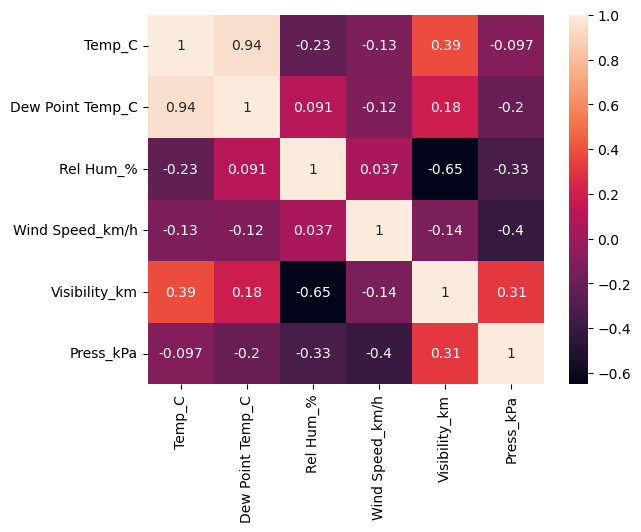

In [38]:
sns.heatmap(cor_matrix,annot =True) #

In [39]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

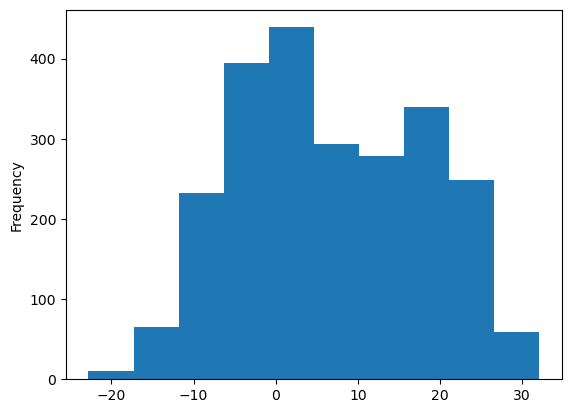

In [40]:
weather_df['Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

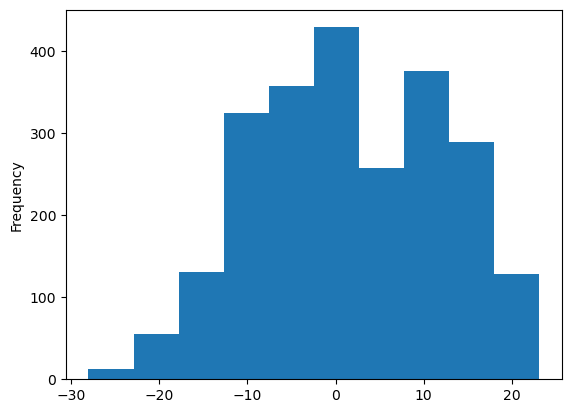

In [41]:
weather_df['Dew Point Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

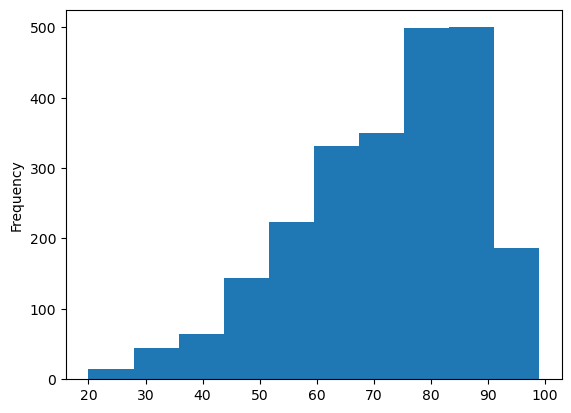

In [42]:
weather_df['Rel Hum_%'].plot(kind='hist') #80% is highest maximum humidity

<Axes: ylabel='Frequency'>

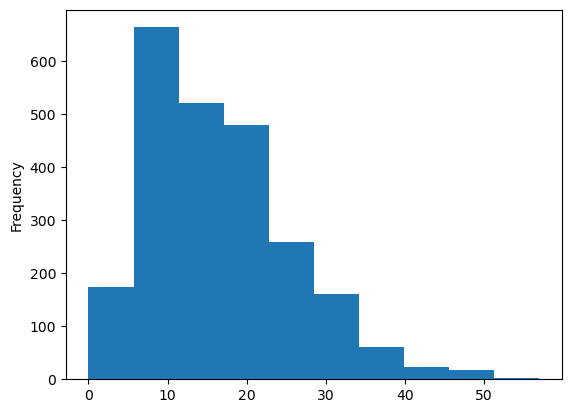

In [43]:
weather_df['Wind Speed_km/h'].plot(kind='hist')

<Axes: ylabel='Frequency'>

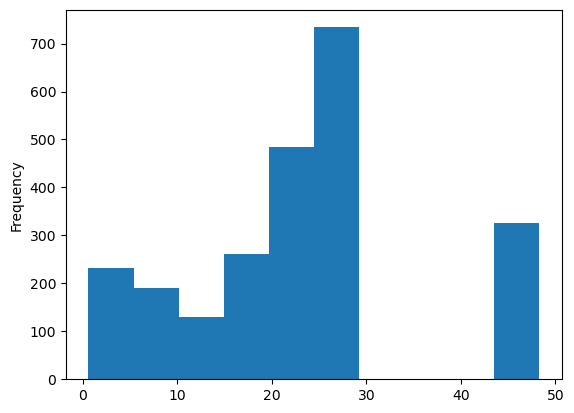

In [44]:
weather_df['Visibility_km'].plot(kind='hist')

<Axes: >

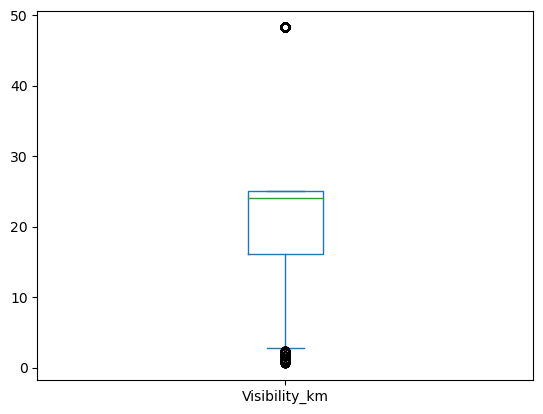

In [45]:
weather_df['Visibility_km'].plot(kind='box')

<Axes: ylabel='Frequency'>

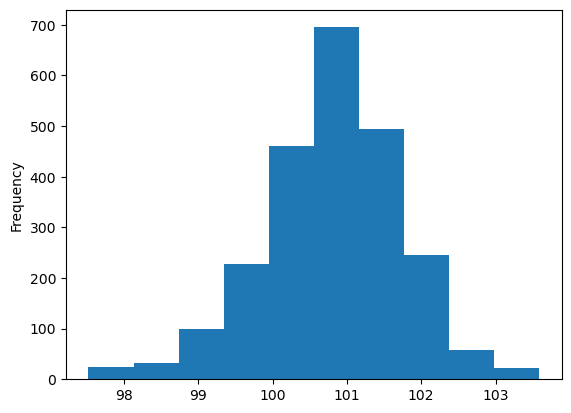

In [46]:
weather_df['Press_kPa'].plot(kind='hist')

<Axes: >

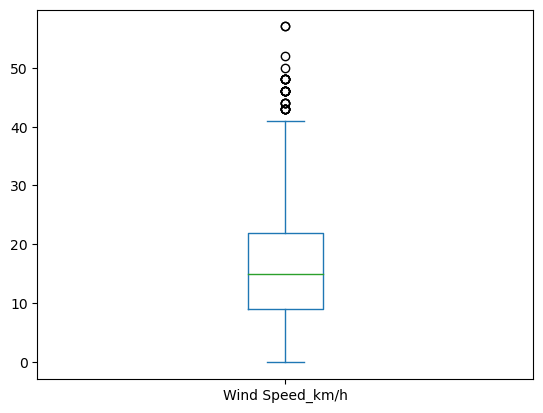

In [47]:
weather_df['Wind Speed_km/h'].plot(kind='box')

In [48]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
5187,21.8,14.8,64,6,25.0,101.61,CLOUDY
4020,23.8,13.1,51,6,48.3,102.04,CLOUDY
8183,-1.1,-6.0,69,7,25.0,101.73,CLOUDY
7294,15.0,13.9,93,17,25.0,99.49,CLOUDY
4479,24.3,16.7,63,11,48.3,100.69,CLOUDY


### label encoding
converting target variable into the numeric

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
label_Encoder = LabelEncoder()

In [51]:
weather_df['std_Weather'] = label_Encoder.fit_transform(weather_df['std_Weather']) #here i converted into the numeric

In [52]:
label_Encoder.classes_

array(['CLOUDY', 'Clear', 'RAIN', 'SNOW'], dtype=object)

In [53]:
weather_df.head() #target column is converted into numeric

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
5187,21.8,14.8,64,6,25.0,101.61,0
4020,23.8,13.1,51,6,48.3,102.04,0
8183,-1.1,-6.0,69,7,25.0,101.73,0
7294,15.0,13.9,93,17,25.0,99.49,0
4479,24.3,16.7,63,11,48.3,100.69,0


In [54]:
weather_df.std_Weather.value_counts()

2    603
0    600
1    600
3    556
Name: std_Weather, dtype: int64

### x,y variables:

In [55]:
#independent variable
x = weather_df.drop(['std_Weather'],axis = 1)
x

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
5187,21.8,14.8,64,6,25.0,101.61
4020,23.8,13.1,51,6,48.3,102.04
8183,-1.1,-6.0,69,7,25.0,101.73
7294,15.0,13.9,93,17,25.0,99.49
4479,24.3,16.7,63,11,48.3,100.69
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [56]:
#target variable:
y = weather_df['std_Weather']
y

5187    0
4020    0
8183    0
7294    0
4479    0
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: std_Weather, Length: 2359, dtype: int32

### feature scaling

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
std_scaler = StandardScaler()

In [59]:
x_std = std_scaler.fit_transform(x)
x_std

array([[ 1.33757169,  1.25256972, -0.53921325, -1.13255595,  0.15851646,
         0.87490812],
       [ 1.51362051,  1.09150634, -1.36680208, -1.13255595,  2.01808222,
         1.3406085 ],
       [-0.67818718, -0.71808814, -0.22090985, -1.02618154,  0.15851646,
         1.00487102],
       ...,
       [-0.62537254, -0.29174389,  1.30694647,  1.20768089, -1.45363927,
        -0.92291194],
       [-0.59896522, -0.32016684,  1.05230375,  1.20768089, -1.06257179,
        -0.96623291],
       [-0.58136034, -0.34858979,  0.86132171,  1.4204297 , -0.93487629,
        -0.98789339]])

### splitting data into training and testing:

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(x_std,y,test_size=0.2,random_state=42)

In [64]:
xtrain.shape,xtest.shape

((1887, 6), (472, 6))

### model building:

In [65]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

### model training:

In [66]:
decision_tree_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

### model predictions

In [97]:
ypred_dt=decision_tree_model.predict(xtest)
ypred_dt

array([1, 0, 3, 2, 3, 3, 0, 3, 1, 3, 2, 2, 2, 1, 0, 3, 1, 2, 1, 3, 1, 3,
       1, 2, 0, 1, 0, 3, 0, 0, 3, 1, 1, 2, 2, 2, 1, 3, 3, 2, 2, 2, 1, 3,
       2, 0, 2, 3, 2, 2, 1, 1, 3, 2, 1, 3, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 1, 0, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 2, 2, 0, 2, 3, 1,
       0, 2, 1, 1, 2, 3, 0, 1, 1, 0, 2, 0, 2, 3, 3, 2, 3, 0, 0, 0, 3, 0,
       1, 0, 2, 3, 2, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 0, 3, 1, 2, 0, 2, 1,
       0, 2, 0, 2, 3, 2, 1, 3, 3, 2, 0, 3, 0, 3, 0, 3, 1, 0, 3, 2, 1, 1,
       0, 3, 0, 2, 0, 3, 3, 0, 2, 0, 1, 0, 2, 1, 1, 2, 3, 0, 2, 2, 0, 0,
       1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 3, 0,
       1, 1, 0, 2, 0, 3, 0, 2, 3, 0, 3, 1, 3, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 1, 0, 3, 2, 2, 3, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 3,
       0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 3, 3, 0, 0, 2, 0,
       1, 3, 0, 2, 3, 1, 2, 3, 0, 3, 1, 0, 3, 3, 3, 2, 1, 0, 2, 1, 3, 1,
       2, 3, 0, 0, 2, 2, 1, 2, 0, 3, 2, 1, 1, 0, 2,

### model evaluations:

In [69]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### accuracy

In [70]:
accuracy_score(ytest,ypred_dt)

0.614406779661017

### Classification report:

In [71]:
print(classification_report(ytest,ypred_dt)) # i can see lot of variations b/w 0 to 3

              precision    recall  f1-score   support

           0       0.45      0.47      0.46       128
           1       0.59      0.57      0.58       118
           2       0.64      0.66      0.65       126
           3       0.83      0.80      0.82       100

    accuracy                           0.61       472
   macro avg       0.63      0.62      0.63       472
weighted avg       0.62      0.61      0.62       472



### confusion matrix:

<Axes: >

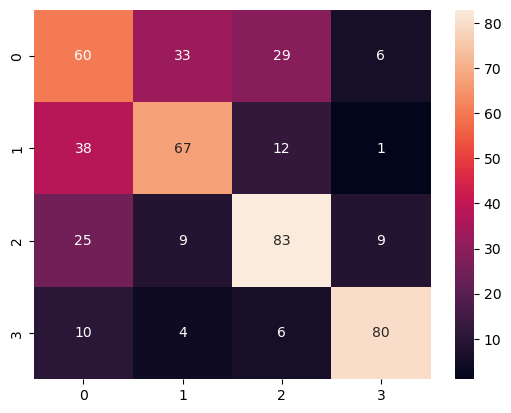

In [72]:
cm = confusion_matrix(ytest,ypred_dt)
sns.heatmap(cm,annot = True,fmt = 'd') #here diagonal metrix are correctly classified rest of the value are missclassified

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(xtrain,ytrain)

In [ ]:
ypred_rf = rf_model.predict(x_test)

In [ ]:
accuracy_score(ytest,ypred_rf)

### building multiple model:Best models:

In [74]:
from sklearn.tree import DecisionTreeClassifier   
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [75]:
dt_model =DecisionTreeClassifier()
rf_model = RandomForestClassifier()  #there i created object of an each model.
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
nb_model = GaussianNB()

In [78]:
model_list = [dt_model,rf_model,svc_model,knn_model,lr_model,nb_model]

In [80]:
acc_list = []
for model in model_list:
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    acc = accuracy_score(ytest,ypred)
    acc_list.append(acc)

In [81]:
acc_list #66% is highest accuracy

[0.5995762711864406,
 0.6652542372881356,
 0.5932203389830508,
 0.6461864406779662,
 0.597457627118644,
 0.5847457627118644]

In [82]:
model_df = pd.DataFrame({'Model':model_list,'Accuracy' : acc_list})
model_df  # so here the best working model is random forest 66% accuracy

,Model,Accuracy
0,DecisionTreeClassifier(),0.599576
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.665254
2,SVC(),0.593220
3,KNeighborsClassifier(),0.646186
4,LogisticRegression(),0.597458
5,GaussianNB(),0.584746


### K-fold cross validation :

In [83]:
from sklearn.model_selection import cross_val_score# it is use to check output,it will check 5 differnt training & testing data
scores = cross_val_score(rf_model,x_std,y,cv = 5,scoring = 'accuracy')
print('cross validation score =',scores)

cross validation score = [0.61016949 0.64194915 0.61228814 0.59322034 0.66454352]


In [84]:
scores.mean() # 62% accuracy

0.6244341286120407

### Hyperparameter tuning: model tuning:

In [86]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [87]:
parameters = {
    'n_estimators':[50,100],
    'max_features': ['sqrt','log2',None]
}

In [88]:
grid_search = GridSearchCV(estimator = rf_model,
                          param_grid = parameters)

In [89]:
grid_search.fit(xtrain,ytrain) 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

### Best hyperparameter

In [90]:
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 100}

In [91]:
Random_forest_model_new = RandomForestClassifier(max_features='log2',n_estimators = 50)

In [92]:
Random_forest_model_new.fit(xtrain,ytrain)

RandomForestClassifier(max_features='log2', n_estimators=50)

In [93]:
ypred_rf=Random_forest_model_new.predict(xtest)

In [94]:
accuracy_score(ytest,ypred)

0.5847457627118644

In [95]:
from sklearn.model_selection import cross_val_score# it is use to check output,it will check 5 differnt training & testing data
scores = cross_val_score(rf_model,x_std,y,cv = 5,scoring = 'accuracy')
print('cross validation score =',scores) #64 % is best accuracy in 5 

cross validation score = [0.5720339  0.64194915 0.60805085 0.58898305 0.6433121 ]


In [96]:
scores.mean() # best accuracy

0.610865810212674